<u>Changes:</u> We added the option to pay not only by credit card but also with PayPal. 

<u>Hypothesis:</u> An additional payment option on the cc-form will increase the payment conversion rate, which will have a 
positive impact on ARPU

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

user_group_df = pd.read_csv('data/first.csv')
user_info_df = pd.read_csv('data/second.csv')
sales_df = pd.read_csv('data/third.csv')

display(user_group_df.head())
display(user_info_df.head())
display(sales_df.head())

,user_id,test_group
0,67965031,control
1,69383300,control
2,70565882,variant
3,69532131,control
4,71418259,variant


,user_id,user_segment,geo,os_name,cpu,ram,gpu_x,gpu_y
0,68777666,Old users,US,Microsoft Windows 10 Pro,Intel Core i7,4088940.0,1366,768
1,69577021,Old users,US,Microsoft Windows 11 Home,Intel Core i3,8023950.0,1366,768
2,67945567,Old users,US,Microsoft Windows 11 Home,AMD Ryzen 7,33357600.0,1920,1080
3,69061876,Old users,US,Microsoft Windows 10 Pro,Intel Core i5,6175130.0,1920,1080
4,69758298,Old users,US,Microsoft Windows 11 Home,AMD Ryzen 7,33075900.0,1920,1080


,user_id,show_Ad,visit_PP,visit_CC,paid,revenue,cogs,fee
0,71448104,25,4,1,0,0.0,0.0,0.0
1,70687937,11,2,0,0,0.0,0.0,0.0
2,70675601,9,3,1,0,0.0,0.0,0.0
3,70097791,13,1,0,0,0.0,0.0,0.0
4,67611577,6,0,0,0,0.0,0.0,0.0


### Data preparation: 

- merge tables
- analyze and clean data 
- balance check between groups for each category

In [2]:
df = user_group_df.merge(user_info_df, how='left', on='user_id')
df = df.merge(sales_df, how='left', on='user_id')

df.head()

,user_id,test_group,user_segment,geo,os_name,cpu,ram,gpu_x,gpu_y,show_Ad,visit_PP,visit_CC,paid,revenue,cogs,fee
0,67965031,control,Old users,US,Microsoft Windows 11 Home,AMD Ryzen 3,6209940.0,1920,1080,149,3,1,0,0.00,0.0,0.0
1,69383300,control,Old users,US,Microsoft Windows 11 Home,Intel Celeron,3950800.0,1366,768,7,2,0,0,0.00,0.0,0.0
2,70565882,variant,Old users,US,Microsoft Windows 11 Pro,Intel Core i5,16545900.0,1920,1080,11,4,0,0,0.00,0.0,0.0
3,69532131,control,Old users,US,Microsoft Windows 10 Home,AMD Ryzen 3,6203650.0,1600,900,2,2,0,0,0.00,0.0,0.0
4,71418259,variant,Old users,US,Microsoft Windows 11 Pro,Intel Core i3,24883700.0,1920,1080,16,4,0,1,9.99,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122077 entries, 0 to 122076
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   user_id       122077 non-null  int64  
 1   test_group    122077 non-null  object 
 2   user_segment  122077 non-null  object 
 3   geo           122077 non-null  object 
 4   os_name       122067 non-null  object 
 5   cpu           115070 non-null  object 
 6   ram           122077 non-null  float64
 7   gpu_x         122077 non-null  int64  
 8   gpu_y         122077 non-null  int64  
 9   show_Ad       122077 non-null  int64  
 10  visit_PP      122077 non-null  int64  
 11  visit_CC      122077 non-null  int64  
 12  paid          122077 non-null  int64  
 13  revenue       122077 non-null  float64
 14  cogs          122077 non-null  float64
 15  fee           122077 non-null  float64
dtypes: float64(4), int64(7), object(5)
memory usage: 14.9+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,122077.0,6.736132e+07,4.258943e+06,681662.0,65771098.0,68673824.0,70047493.0,7.334796e+07
ram,122077.0,1.261213e+07,9.060513e+06,0.0,8019530.0,8277910.0,16500100.0,2.010800e+08
gpu_x,122077.0,1.859489e+03,4.552327e+02,0.0,1600.0,1920.0,1920.0,1.152000e+04
gpu_y,122077.0,1.060834e+03,2.601344e+02,0.0,900.0,1080.0,1080.0,3.000000e+03
show_Ad,122077.0,1.413412e+01,2.270155e+01,0.0,1.0,5.0,17.0,4.370000e+02
visit_PP,122077.0,1.860662e+00,1.622596e+00,0.0,0.0,2.0,3.0,1.000000e+01
visit_CC,122077.0,4.070300e-01,8.748205e-01,0.0,0.0,0.0,0.0,7.000000e+00
paid,122077.0,3.235663e-03,6.069555e-02,0.0,0.0,0.0,0.0,3.000000e+00
revenue,122077.0,2.248950e-01,5.365254e+00,0.0,0.0,0.0,0.0,4.179700e+02
cogs,122077.0,2.089255e-02,1.039719e+00,0.0,0.0,0.0,0.0,1.080000e+02


In [5]:
df.groupby('test_group').size()

test_group
control    61147
variant    60930
dtype: int64

In [6]:
df.isna().sum()

user_id            0
test_group         0
user_segment       0
geo                0
os_name           10
cpu             7007
ram                0
gpu_x              0
gpu_y              0
show_Ad            0
visit_PP           0
visit_CC           0
paid               0
revenue            0
cogs               0
fee                0
dtype: int64

In [7]:
df['cpu'] = df['cpu'].fillna('Unknown')
df['os_name'] = df['os_name'].fillna('Unknown')

In [8]:
df.isna().sum()

user_id         0
test_group      0
user_segment    0
geo             0
os_name         0
cpu             0
ram             0
gpu_x           0
gpu_y           0
show_Ad         0
visit_PP        0
visit_CC        0
paid            0
revenue         0
cogs            0
fee             0
dtype: int64

In [9]:
df['profit'] = df['revenue'] - df['cogs'] - df['fee']
df.columns

Index(['user_id', 'test_group', 'user_segment', 'geo', 'os_name', 'cpu', 'ram',
       'gpu_x', 'gpu_y', 'show_Ad', 'visit_PP', 'visit_CC', 'paid', 'revenue',
       'cogs', 'fee', 'profit'],
      dtype='object')

In [10]:
df['user_segment'].unique()

array(['Old users'], dtype=object)

In [11]:
df['geo'].unique()

array(['US', 'CA', 'AU', 'ID', 'IR', 'BD', 'CI'], dtype=object)

In [12]:
df['os_name'].unique()

array(['Microsoft Windows 11 Home', 'Microsoft Windows 11 Pro',
       'Microsoft Windows 10 Home', 'Microsoft Windows 11 Famille',
       'Microsoft Windows 11 Home in S mode', 'Microsoft Windows 10 Pro',
       'Microsoft Windows 11 å®¶åº\xadä¸\xadæ\x96\x87ç\x89\x88',
       'Microsoft Windows 10 Professionnel',
       'Microsoft Windows 11 Home Single Language',
       'Microsoft Windows 10 Famille', 'Microsoft Windows 11 Business',
       'Microsoft Windows 10 Pro for Workstations',
       'Microsoft Windows 11 Professionnel',
       'Microsoft Windows 11 Education',
       'Microsoft Windows 10 Pro Education',
       'Microsoft Windows 10 Education',
       'Microsoft Windows 10 Home Single Language',
       '?????????? Windows 11 Home', 'Microsoft Windows 11 Pro Education',
       'Microsoft Windows 10 ??Í¥??',
       'Microsoft Windows 10 ä¸\x93ä¸\x9aç\x89\x88',
       '?????????? Windows 10 Pro',
       'Microsoft Windows 10 Professionnel pour les Stations de travail',
       '

In [13]:
def clean_os_name(os_name):
    os_name = str(os_name).lower()

    if 'windows 11' in os_name:
        if 'home' in os_name:
            return 'Windows 11 Home'
        elif 'pro' in os_name:
            return 'Windows 11 Pro'
        elif 'education' in os_name:
            return 'Windows 11 Education'
        elif 'enterprise' in os_name:
            return 'Windows 11 Enterprise'
        else:
            return 'Windows 11 Other'
        
    if 'windows 10' in os_name:
        if 'home' in os_name:
            return 'Windows 10 Home'
        elif 'pro' in os_name:
            return 'Windows 10 Pro'
        elif 'education' in os_name:
            return 'Windows 10 Education'
        elif 'enterprise' in os_name:
            return 'Windows 10 Enterprise'
        else:
            return 'Windows 10 Other'
    
    else:
        return 'Other' 
    
df['os_name_cleaned'] = df['os_name'].apply(clean_os_name)

df['os_name_cleaned'].unique()

array(['Windows 11 Home', 'Windows 11 Pro', 'Windows 10 Home',
       'Windows 11 Other', 'Windows 10 Pro', 'Windows 10 Other',
       'Windows 11 Education', 'Windows 10 Education', 'Other',
       'Windows 10 Enterprise'], dtype=object)

In [14]:
df['cpu'].unique()

array(['AMD Ryzen 3', 'Intel Celeron', 'Intel Core i5', 'Intel Core i3',
       'Intel Pentium', 'Unknown', 'Intel Core i7', 'AMD Ryzen 7',
       'AMD Ryzen 5', 'Intel Core', 'AMD Athlon', 'Intel Core i9',
       'AMD Ryzen 9', 'AMD Ryzen Threadripper'], dtype=object)

In [15]:
categorical_features = ['geo', 'os_name_cleaned', 'cpu']

for category in categorical_features:
    display(pd.crosstab(df['test_group'], df[category]))

geo,AU,BD,CA,CI,ID,IR,US
test_group,,,,,,,
control,5522,0,10381,1,0,1,45242
variant,5486,1,10441,0,1,0,45001


os_name_cleaned,Other,Windows 10 Education,Windows 10 Enterprise,Windows 10 Home,Windows 10 Other,Windows 10 Pro,Windows 11 Education,Windows 11 Home,Windows 11 Other,Windows 11 Pro
test_group,,,,,,,,,,
control,42,294,1,9242,599,8996,314,33022,1109,7528
variant,41,258,1,9166,590,8947,329,32936,1112,7550


cpu,AMD Athlon,AMD Ryzen 3,AMD Ryzen 5,AMD Ryzen 7,AMD Ryzen 9,AMD Ryzen Threadripper,Intel Celeron,Intel Core,Intel Core i3,Intel Core i5,Intel Core i7,Intel Core i9,Intel Pentium,Unknown
test_group,,,,,,,,,,,,,,
control,933,1997,5640,2858,307,1,4246,1245,6591,19956,10936,608,2390,3439
variant,889,1899,5571,2743,318,5,4228,1207,6663,19760,11232,561,2286,3568


In [16]:
# if p-value > 0.05 then balanced
for category in categorical_features:
    chi2, p, dof, ex = stats.chi2_contingency(pd.crosstab(df['test_group'], df[category]))
    print('p-value: ', p)

p-value:  0.6028764300324181
p-value:  0.9647660080913125
p-value:  0.0671354939411893


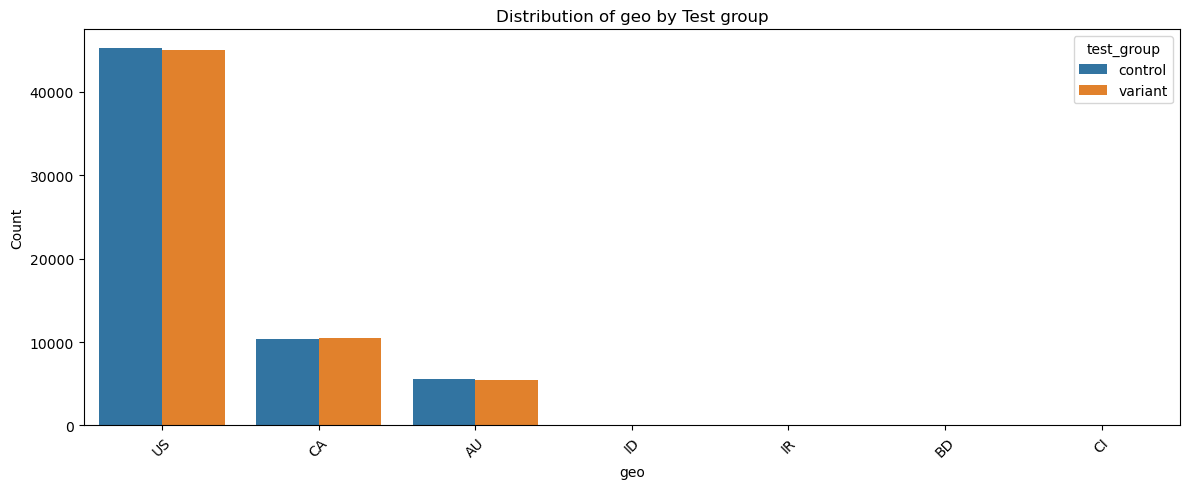

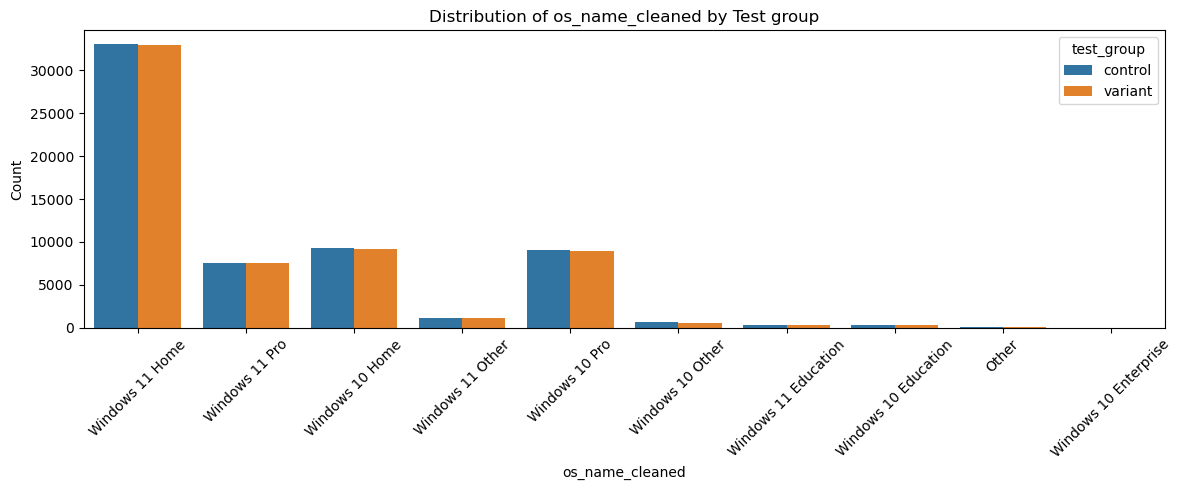

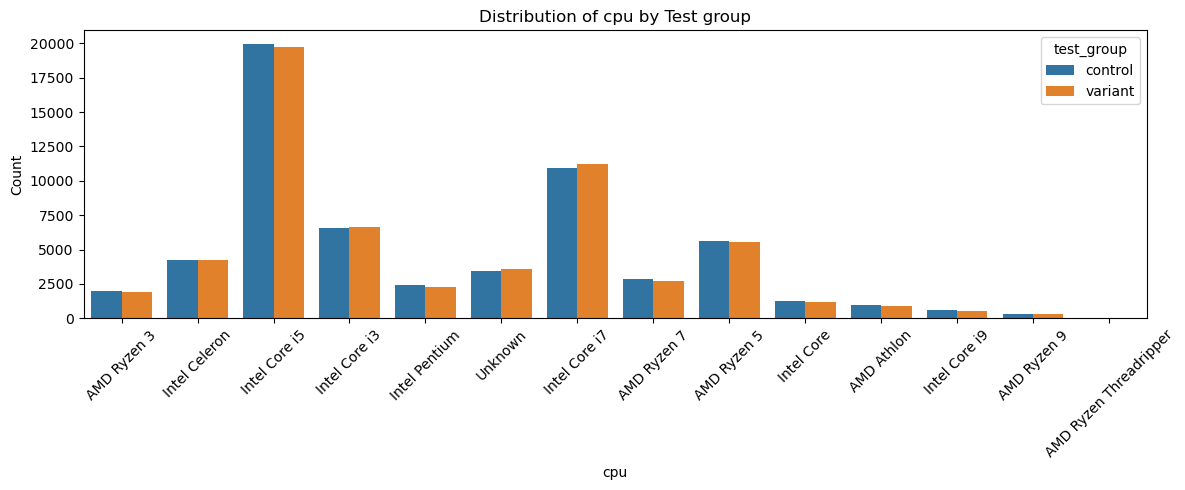

In [17]:
for category in categorical_features:
    plt.figure(figsize=(12, 5))

    sns.countplot(data=df, x=category, hue='test_group')
    plt.title(f'Distribution of {category} by Test group')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()
    

In [18]:
continuous_features = ['ram', 'gpu_x', 'gpu_y']

for cont_f in continuous_features:
    display(pd.crosstab(df['test_group'], df[cont_f]))

ram,0.0,1048044.0,1549720.0,1679730.0,1832020.0,1832330.0,1833390.0,1884590.0,1914796.0,1916020.0,...,134122000.0,134123000.0,134125000.0,134127000.0,134138000.0,134141000.0,134146000.0,134165000.0,201060992.0,201080000.0
test_group,,,,,,,,,,,,,,,,,,,,,
control,6,1,1,0,0,1,0,1,1,1,...,1,0,0,1,1,1,0,1,0,0
variant,2,0,0,1,1,0,1,0,0,1,...,0,1,1,0,0,1,1,0,1,1


gpu_x,0,400,640,720,800,1000,1024,1080,1104,1110,...,3840,3849,4096,4500,5120,5760,5822,7680,7810,11520
test_group,,,,,,,,,,,,,,,,,,,,,
control,155,0,1,0,30,1,235,2,1,0,...,948,0,33,8,43,2,0,3,1,2
variant,127,1,3,2,33,0,248,5,0,1,...,1026,1,13,7,31,5,1,1,0,0


gpu_y,0,400,480,515,600,634,648,664,720,768,...,1920,2000,2036,2064,2080,2160,2400,2560,2880,3000
test_group,,,,,,,,,,,,,,,,,,,,,
control,155,0,1,1,14,1,1,3,84,13434,...,237,127,1,1,3,906,79,20,1,8
variant,127,1,4,0,15,0,0,3,99,13236,...,256,138,0,0,2,988,64,27,0,7


In [19]:
for cont_f in continuous_features:
    t_stat, p_val = stats.ttest_ind(df[df['test_group'] == 'control'][cont_f], df[df['test_group'] == 'variant'][cont_f])
    print('p-value: ', p_val)

p-value:  0.09016279528789894
p-value:  0.5123098050761767
p-value:  0.2515988609327522


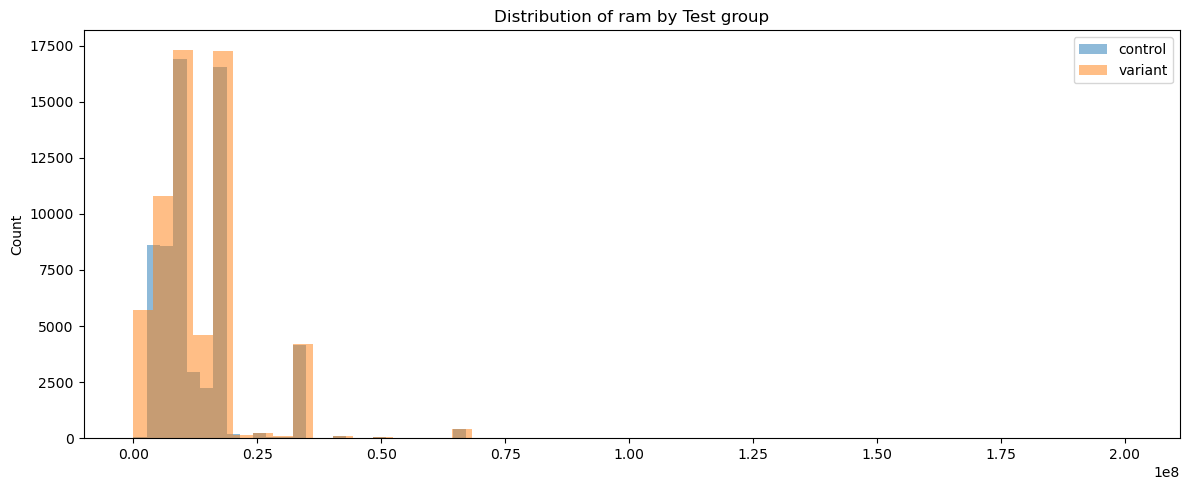

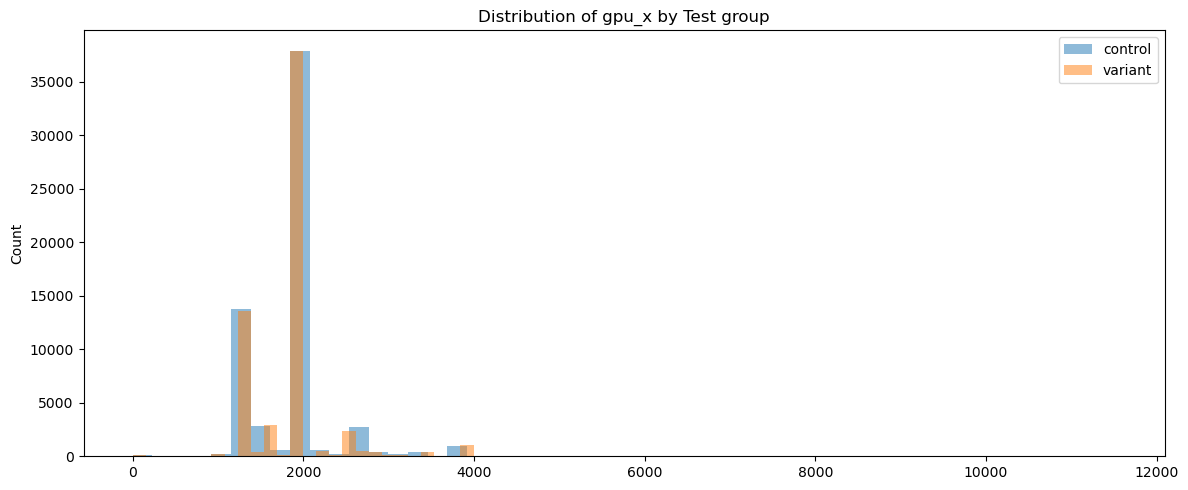

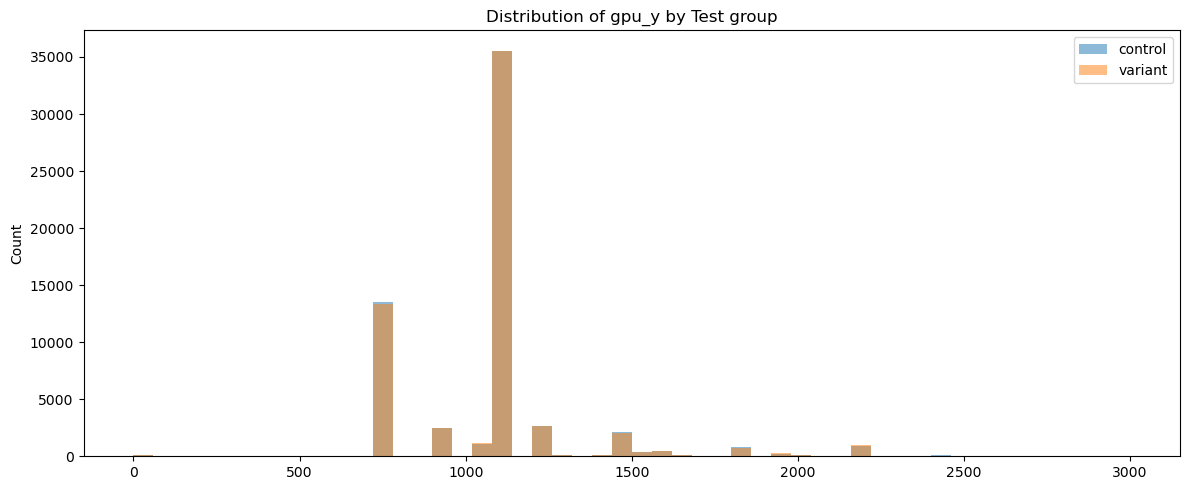

In [20]:
for cont_f in continuous_features:
    plt.figure(figsize=(12,5))
    
    for group in df['test_group'].unique():
        group_df = df[df['test_group'] == group]
        plt.hist(group_df[cont_f], bins=50, alpha=0.5, label=group)
    
    plt.title(f'Distribution of {cont_f} by Test group')
    plt.ylabel('Count')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

Both categorical (geo, os_name, cpu) and continuous (ram, gpu_x, gpu_y) features showed p-value > 0.05 for balance check. This indicates no significant differences between control and variant groups. Therefore, we can consider the randomization valid.

### Funnel analysis: 

- show_ad > visit_PP > visit_CC > paid
- CR of each funnel
- Statistical significance

In [21]:
df.groupby('test_group').agg({
    'show_Ad': pd.Series.sum,
    'visit_PP': pd.Series.sum,
    'visit_CC': pd.Series.sum,
    'paid': pd.Series.sum,
    'revenue': pd.Series.sum
})


,show_Ad,visit_PP,visit_CC,paid,revenue
test_group,,,,,
control,873430,111935,27102,173,11506.75
variant,852021,115209,22587,222,15947.76


In [22]:
df['ad_to_pp_cr'] = np.where(df['show_Ad'] == 0, 0, df['visit_PP'] / df['show_Ad'])
df['pp_to_cc_cr'] = np.where(df['visit_PP'] == 0, 0, df['visit_CC'] / df['visit_PP'])
df['cc_to_paid_cr'] = np.where(df['visit_CC'] == 0, 0, df['paid'] / df['visit_CC'])
df['ad_to_paid_cr'] = np.where(df['show_Ad'] == 0, 0, df['paid'] / df['show_Ad'])

df

,user_id,test_group,user_segment,geo,os_name,cpu,ram,gpu_x,gpu_y,show_Ad,...,paid,revenue,cogs,fee,profit,os_name_cleaned,ad_to_pp_cr,pp_to_cc_cr,cc_to_paid_cr,ad_to_paid_cr
0,67965031,control,Old users,US,Microsoft Windows 11 Home,AMD Ryzen 3,6209940.0,1920,1080,149,...,0,0.00,0.0,0.0,0.00,Windows 11 Home,0.020134,0.333333,0.0,0.0000
1,69383300,control,Old users,US,Microsoft Windows 11 Home,Intel Celeron,3950800.0,1366,768,7,...,0,0.00,0.0,0.0,0.00,Windows 11 Home,0.285714,0.000000,0.0,0.0000
2,70565882,variant,Old users,US,Microsoft Windows 11 Pro,Intel Core i5,16545900.0,1920,1080,11,...,0,0.00,0.0,0.0,0.00,Windows 11 Pro,0.363636,0.000000,0.0,0.0000
3,69532131,control,Old users,US,Microsoft Windows 10 Home,AMD Ryzen 3,6203650.0,1600,900,2,...,0,0.00,0.0,0.0,0.00,Windows 10 Home,1.000000,0.000000,0.0,0.0000
4,71418259,variant,Old users,US,Microsoft Windows 11 Pro,Intel Core i3,24883700.0,1920,1080,16,...,1,9.99,0.0,0.0,9.99,Windows 11 Pro,0.250000,0.000000,0.0,0.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122072,64833332,control,Old users,US,Microsoft Windows 10 Pro,Intel Core i5,8275680.0,1920,1080,0,...,0,0.00,0.0,0.0,0.00,Windows 10 Pro,0.000000,0.000000,0.0,0.0000
122073,65554414,variant,Old users,CA,Microsoft Windows 11 Pro,Intel Core i5,16489500.0,1920,1080,1,...,0,0.00,0.0,0.0,0.00,Windows 11 Pro,1.000000,0.000000,0.0,0.0000
122074,65763619,control,Old users,US,Microsoft Windows 10 Pro,Intel Core i5,8276250.0,1920,1080,0,...,0,0.00,0.0,0.0,0.00,Windows 10 Pro,0.000000,0.000000,0.0,0.0000
122075,70660112,variant,Old users,US,Microsoft Windows 10 Home,Intel Core i7,8268750.0,1920,1080,0,...,0,0.00,0.0,0.0,0.00,Windows 10 Home,0.000000,0.000000,0.0,0.0000


In [23]:
control_df = df[df['test_group'] == 'control']
variant_df = df[df['test_group'] == 'variant']

display(control_df.head())
display(variant_df.head())

,user_id,test_group,user_segment,geo,os_name,cpu,ram,gpu_x,gpu_y,show_Ad,...,paid,revenue,cogs,fee,profit,os_name_cleaned,ad_to_pp_cr,pp_to_cc_cr,cc_to_paid_cr,ad_to_paid_cr
0,67965031,control,Old users,US,Microsoft Windows 11 Home,AMD Ryzen 3,6209940.0,1920,1080,149,...,0,0.0,0.0,0.0,0.0,Windows 11 Home,0.020134,0.333333,0.0,0.0
1,69383300,control,Old users,US,Microsoft Windows 11 Home,Intel Celeron,3950800.0,1366,768,7,...,0,0.0,0.0,0.0,0.0,Windows 11 Home,0.285714,0.000000,0.0,0.0
3,69532131,control,Old users,US,Microsoft Windows 10 Home,AMD Ryzen 3,6203650.0,1600,900,2,...,0,0.0,0.0,0.0,0.0,Windows 10 Home,1.000000,0.000000,0.0,0.0
7,69958112,control,Old users,US,Microsoft Windows 11 Home,Intel Core i3,3875980.0,1366,768,7,...,0,0.0,0.0,0.0,0.0,Windows 11 Home,0.285714,0.000000,0.0,0.0
8,70409469,control,Old users,US,Microsoft Windows 11 Home,Unknown,16425000.0,1366,768,9,...,0,0.0,0.0,0.0,0.0,Windows 11 Home,0.222222,0.000000,0.0,0.0


,user_id,test_group,user_segment,geo,os_name,cpu,ram,gpu_x,gpu_y,show_Ad,...,paid,revenue,cogs,fee,profit,os_name_cleaned,ad_to_pp_cr,pp_to_cc_cr,cc_to_paid_cr,ad_to_paid_cr
2,70565882,variant,Old users,US,Microsoft Windows 11 Pro,Intel Core i5,16545900.0,1920,1080,11,...,0,0.00,0.0,0.0,0.00,Windows 11 Pro,0.363636,0.0,0.0,0.0000
4,71418259,variant,Old users,US,Microsoft Windows 11 Pro,Intel Core i3,24883700.0,1920,1080,16,...,1,9.99,0.0,0.0,9.99,Windows 11 Pro,0.250000,0.0,0.0,0.0625
5,69989086,variant,Old users,US,Microsoft Windows 11 Home,Intel Pentium,3839310.0,1366,768,14,...,0,0.00,0.0,0.0,0.00,Windows 11 Home,0.214286,0.0,0.0,0.0000
6,69664458,variant,Old users,CA,Microsoft Windows 11 Home,Intel Core i5,33363400.0,1920,1080,13,...,0,0.00,0.0,0.0,0.00,Windows 11 Home,0.230769,1.0,0.0,0.0000
11,69957902,variant,Old users,CA,Microsoft Windows 11 Home,Intel Core i3,8117020.0,1920,1080,9,...,0,0.00,0.0,0.0,0.00,Windows 11 Home,0.333333,0.0,0.0,0.0000


In [24]:
funnel = ['show_Ad', 'visit_PP', 'visit_CC', 'paid', 'revenue', 'ad_to_pp_cr', 'pp_to_cc_cr', 'cc_to_paid_cr', 'ad_to_paid_cr']
control_df[funnel].describe().T

,count,mean,std,min,25%,50%,75%,max
show_Ad,61147.0,14.284102,22.954973,0.0,1.0,5.000000,17.000000,437.00
visit_PP,61147.0,1.830589,1.583253,0.0,0.0,2.000000,3.000000,10.00
visit_CC,61147.0,0.443227,0.920584,0.0,0.0,0.000000,0.000000,5.00
paid,61147.0,0.002829,0.055818,0.0,0.0,0.000000,0.000000,3.00
revenue,61147.0,0.188182,4.829408,0.0,0.0,0.000000,0.000000,399.98
ad_to_pp_cr,61147.0,0.233387,0.283364,0.0,0.0,0.133333,0.333333,2.00
pp_to_cc_cr,61147.0,0.149843,0.299716,0.0,0.0,0.000000,0.000000,2.00
cc_to_paid_cr,61147.0,0.001702,0.041043,0.0,0.0,0.000000,0.000000,2.00
ad_to_paid_cr,61147.0,0.000435,0.014334,0.0,0.0,0.000000,0.000000,1.00


In [25]:
variant_df[funnel].describe().T

,count,mean,std,min,25%,50%,75%,max
show_Ad,60930.0,13.983604,22.443526,0.0,1.0,5.000000,17.000000,314.00
visit_PP,60930.0,1.890842,1.660608,0.0,0.0,2.000000,3.000000,9.00
visit_CC,60930.0,0.370704,0.824762,0.0,0.0,0.000000,0.000000,7.00
paid,60930.0,0.003644,0.065223,0.0,0.0,0.000000,0.000000,3.00
revenue,60930.0,0.261739,5.853711,0.0,0.0,0.000000,0.000000,417.97
ad_to_pp_cr,60930.0,0.243234,0.290163,0.0,0.0,0.142857,0.363636,2.00
pp_to_cc_cr,60930.0,0.124007,0.269026,0.0,0.0,0.000000,0.000000,1.00
cc_to_paid_cr,60930.0,0.002406,0.050991,0.0,0.0,0.000000,0.000000,3.00
ad_to_paid_cr,60930.0,0.000534,0.014587,0.0,0.0,0.000000,0.000000,1.00


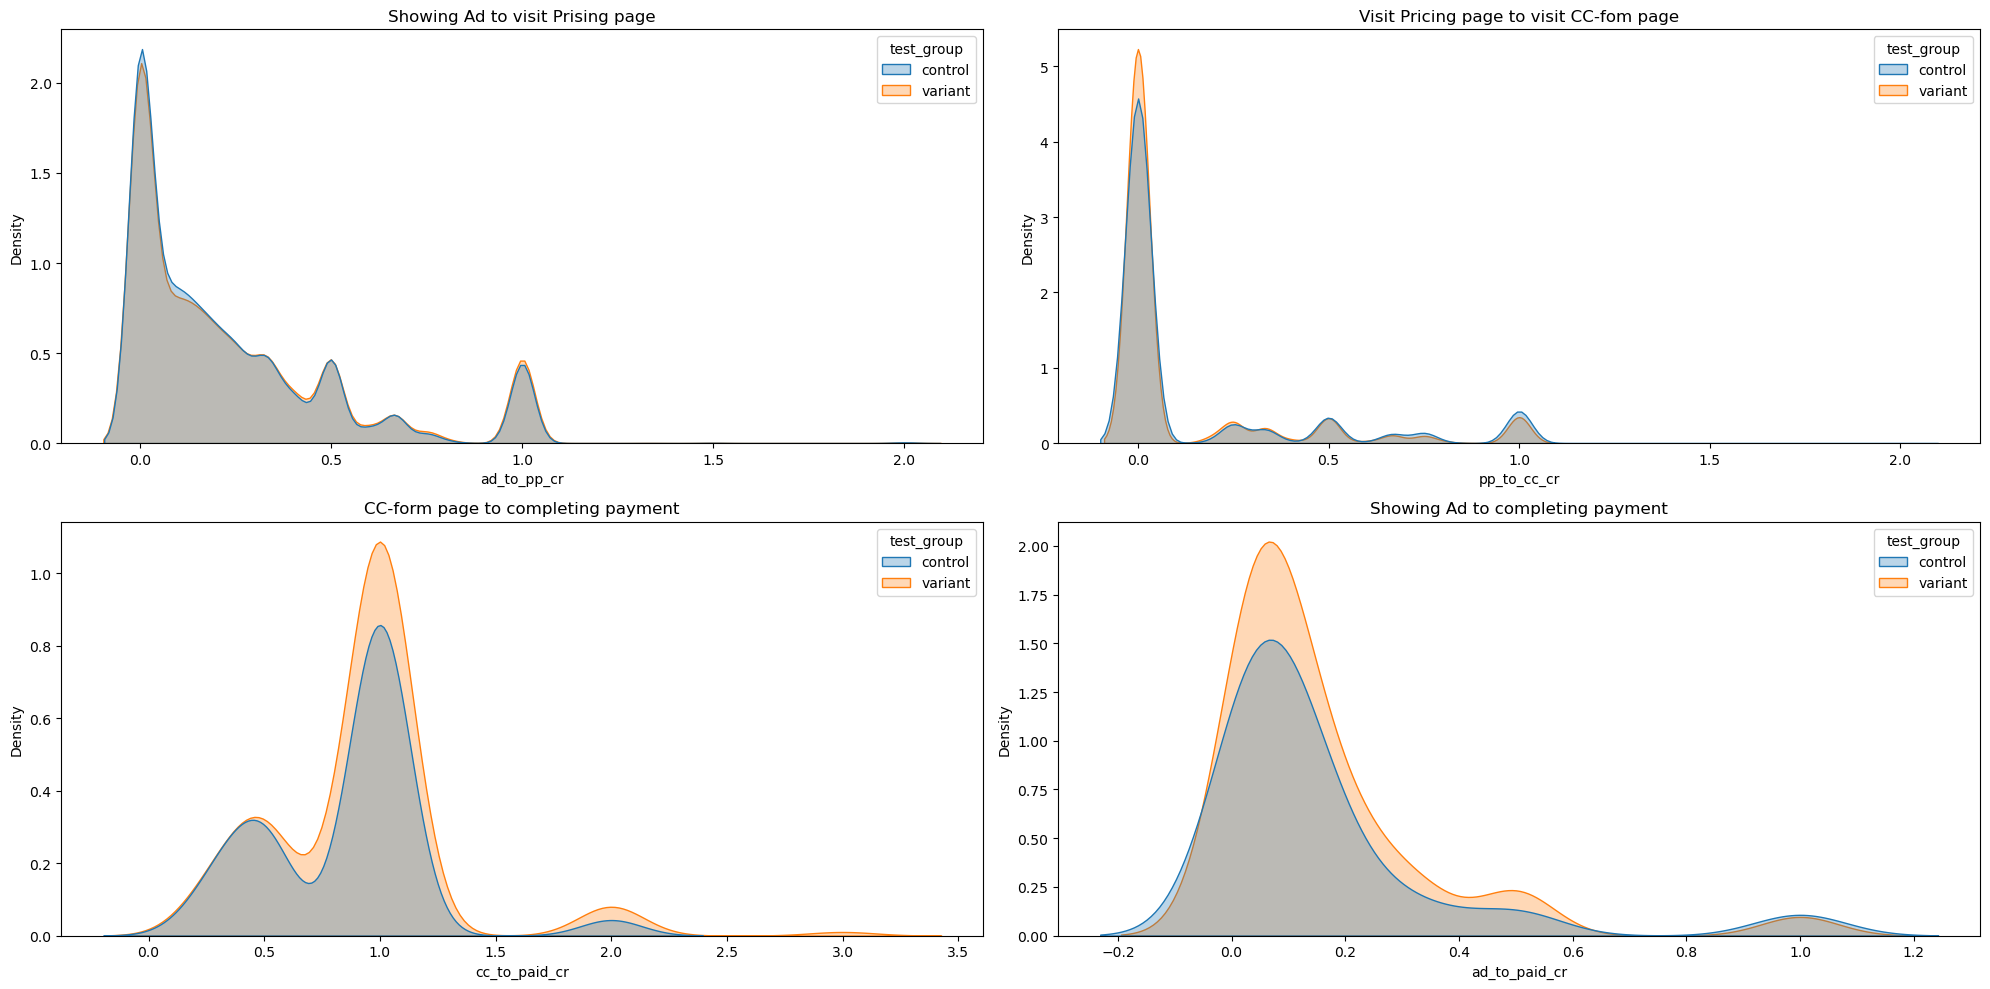

In [26]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
sns.kdeplot(data=df, x='ad_to_pp_cr', hue='test_group', fill=True, alpha=0.3)
plt.title('Showing Ad to visit Prising page')

plt.subplot(2, 2, 2)
sns.kdeplot(data=df, x='pp_to_cc_cr', hue='test_group', fill=True, alpha=0.3)
plt.title('Visit Pricing page to visit CC-fom page')

cc_users = df[df['cc_to_paid_cr'] > 0]
plt.subplot(2, 2, 3)
sns.kdeplot(data=cc_users, x='cc_to_paid_cr', hue='test_group', fill=True, alpha=0.3)
plt.title('CC-form page to completing payment')

paid_users = df[df['ad_to_paid_cr'] > 0]
plt.subplot(2, 2, 4)
sns.kdeplot(data=paid_users, x='ad_to_paid_cr', hue='test_group', hue_order=['control', 'variant'], fill=True, alpha=0.3)
plt.title('Showing Ad to completing payment')

plt.tight_layout()
plt.show()

- Funnels "From showing Ad to visit Prising page" and "From visit Pricing page to visit CC-fom page" distributions do not demonstrate noticeable significant differences between groups

- Funnel "From CC-form page to completing payment" shows a clear positive effect for the variant group compared to control. Adding PayPal positivly impacted the probability of completing a payment

- The main funnel "From showing Ad to completing payment" also demonstrates stronger perfornamce of the variant group. This improvement results mainly from the higher Conversion rate at the payment step

In [27]:
ad_pp_table = pd.crosstab(df['test_group'], df['visit_PP'] > 0)
chi2, p, dof, ex = stats.chi2_contingency(ad_pp_table)
print('Ad to PP p-value: ', p)

pp_users = df[df['visit_PP'] > 0]
pp_cc_table = pd.crosstab(pp_users['test_group'], pp_users['visit_CC'] > 0)
chi2, p, dof, ex = stats.chi2_contingency(pp_cc_table)
print('PP to CC p-value: ', p)

cc_users = df[df['visit_CC'] > 0]
cc_paid_table = pd.crosstab(cc_users['test_group'], cc_users['paid'] > 0)
chi2, p, dof, ex = stats.chi2_contingency(cc_paid_table)
print('CC to Payment p-value: ', p)

ad_paid_table = pd.crosstab(df['test_group'], df['paid'] > 0)
chi2, p, dof, ex = stats.chi2_contingency(ad_paid_table)
print('Ad to Payment p-value: ', p)

Ad to PP p-value:  0.5829918618296756
PP to CC p-value:  3.9806379746952594e-26
CC to Payment p-value:  0.0019586799807642745
Ad to Payment p-value:  0.03893810395919934


- Conversion Rate "From showing Ad to visit Pricing Page" shows no significant difference between control and variant groups (p-value = 0.5)

- CR of "From visit Pricing page to visit CC-fom page" demonstrates a highly significant difference (p-value = 3.98e-26). Despite the KDE not showing anoticeable difference in distribution, the chi-square test confirms that users int the **variant group shows higher tendency to proceed from Pricing page to CC Form**

- As expected, "From CC-form page to completing payment" and "From showing Ad to completing payment" show significant improvements (p-values = 0.00196 and 0.0389 respectively). It indicates that the variant group with PayPal integration has a higher probability of completing payment

In [28]:
control_arpu = control_df['revenue'].sum() / control_df['user_id'].nunique()
variant_arpu = variant_df['revenue'].sum() / variant_df['user_id'].nunique()

control_appu = control_df['profit'].sum() / control_df['user_id'].nunique()
variant_appu = variant_df['profit'].sum() / variant_df['user_id'].nunique()

print(f'Control group ARPU: ${control_arpu:.2f}')
print(f'Variant group ARPU: ${variant_arpu:.2f}')
print(f'Difference ARPU: ${variant_arpu - control_arpu:.2f}')

print(f'\nControl group APPU: ${control_appu:.2f}')
print(f'Variant group APPU: ${variant_appu:.2f}')
print(f'Difference APPU: ${variant_appu - control_appu:.2f}')

Control group ARPU: $0.19
Variant group ARPU: $0.26
Difference ARPU: $0.07

Control group APPU: $0.17
Variant group APPU: $0.23
Difference APPU: $0.07


Text(0.5, 1.0, 'Profit Distribution')

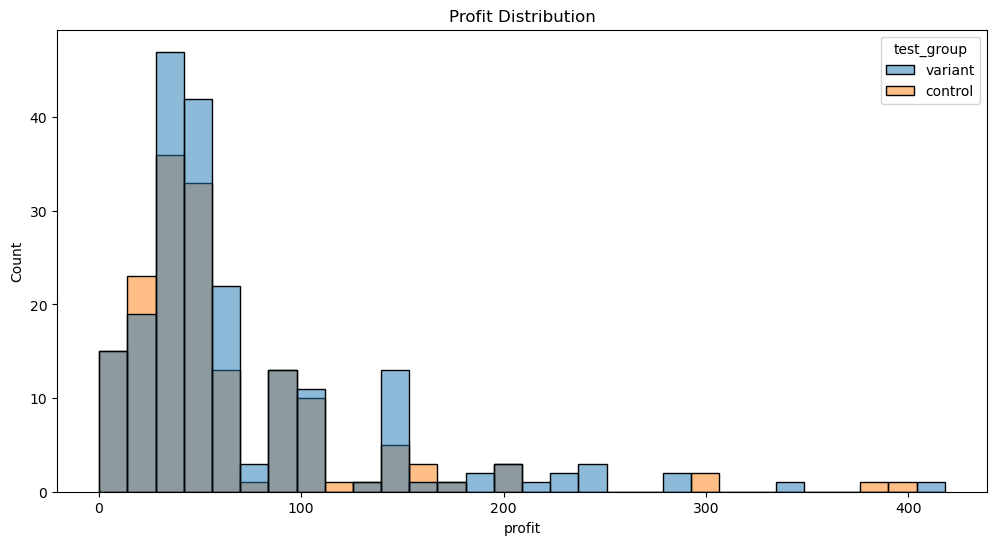

In [29]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['profit'] > 0], x='profit', hue='test_group', bins=30)
plt.title('Profit Distribution')

In [30]:
t_stat, p_val = stats.ttest_ind(control_df['revenue'], variant_df['revenue'])
print('Revenue p-value: ', p_val)

t_stat, p_val = stats.ttest_ind(control_df['profit'], variant_df['profit'])
print('Profit p-value: ', p_val)

Revenue p-value:  0.016615714076805496
Profit p-value:  0.01992574205653919


The analysis shows that the **variant** group demonstrates a significantly higher ARPU (revenue) and APPU (profit) compared to the control group (Revenue p-value = 0.016, Profit p-value = 0.019). This confirms that adding PayPal positively impacts on both revenue and profit per user, supporting the hypothesis that the variant group performs better financially.

### Segment analysis

In [31]:
for geo in df['geo'].unique():
    geo_table = pd.crosstab(df[df['geo'] == geo]['test_group'], df[df['geo'] == geo]['paid'] > 0)

    if geo_table.shape[0] == 2: # check if both groups exist
        chi2, p, dof, ex = stats.chi2_contingency(geo_table)
        print(f'{geo} p-value: {p:.5f}')

US p-value: 0.08267
CA p-value: 0.07439
AU p-value: 0.77633


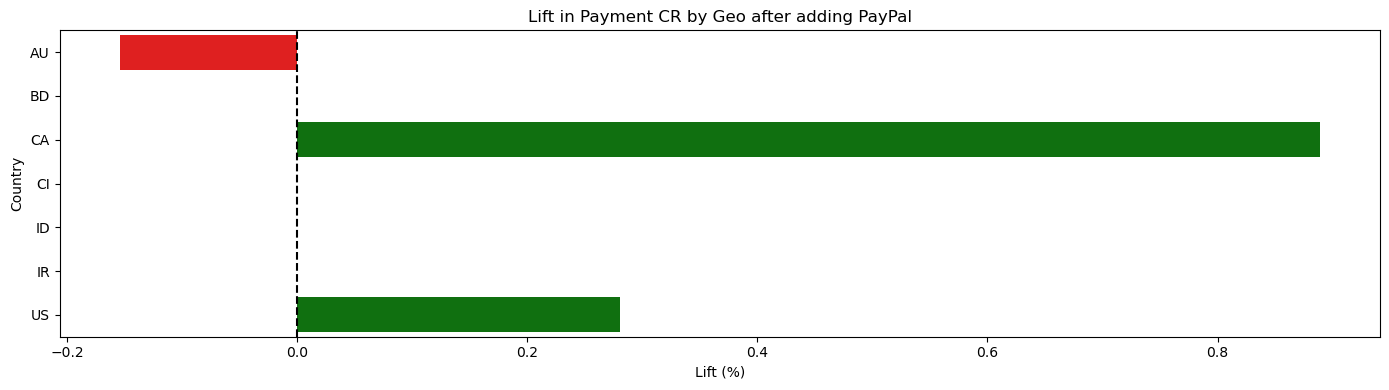

In [32]:
geo_summary = df.groupby(['geo', 'test_group'])['paid'].agg(['mean', 'count']).reset_index()
geo_pivot = geo_summary.pivot(index='geo', columns='test_group', values='mean')
geo_pivot['lift'] = (geo_pivot['variant'] - geo_pivot['control']) / geo_pivot['control']
geo_pivot['color'] = ['Negative' if y < 0 else 'Positive' for y in geo_pivot['lift']]

plt.figure(figsize=(14, 4))
sns.barplot(data=geo_pivot.reset_index(), x='lift', y='geo', hue='color', palette={'Positive': 'green', 'Negative': 'red'}, legend=False)
plt.axvline(0, color='black', linestyle='--') 
plt.title('Lift in Payment CR by Geo after adding PayPal')
plt.xlabel('Lift (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

- US and CA users showed borderline significant improvement in payment (US p=0.08267, CA p=0.07439)

- AU demonstrated no significant difference (p=0.77633)

- Other countries have only one group making it's impossible to check significance

- The lift indicates that North American (US, CA) markets responded more positively to PayPal integration

In [33]:
for os_name in df['os_name_cleaned'].unique():
    os_table = pd.crosstab(df[df['os_name_cleaned'] == os_name]['test_group'], df[df['os_name_cleaned'] == os_name]['paid'] > 0)
    
    if os_table.shape[0] == 2:  
        chi2, p, dof, ex = stats.chi2_contingency(os_table)
        print(f'{os_name} p-value: {p:.5f}')

Windows 11 Home p-value: 0.02259
Windows 11 Pro p-value: 1.00000
Windows 10 Home p-value: 0.44357
Windows 11 Other p-value: 0.72606
Windows 10 Pro p-value: 0.39958
Windows 10 Other p-value: 0.24227
Windows 11 Education p-value: 1.00000
Windows 10 Education p-value: 1.00000
Other p-value: 1.00000
Windows 10 Enterprise p-value: 1.00000


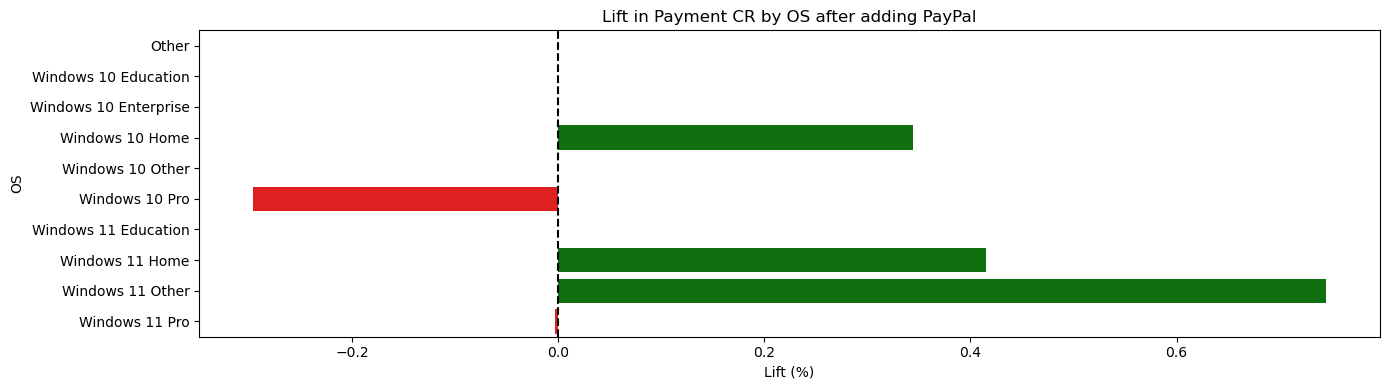

In [34]:
os_summary = df.groupby(['os_name_cleaned', 'test_group'])['paid'].agg(['mean', 'count']).reset_index()
os_pivot = os_summary.pivot(index='os_name_cleaned', columns='test_group', values='mean')
os_pivot['lift'] = (os_pivot['variant'] - os_pivot['control']) / os_pivot['control']
os_pivot['color'] = ['Negative' if y < 0 else 'Positive' for y in os_pivot['lift']]

plt.figure(figsize=(14, 4))
sns.barplot(data=os_pivot.reset_index(), x='lift', y='os_name_cleaned', hue='color', palette={'Positive': 'green', 'Negative': 'red'}, legend=False)
plt.axvline(0, color='black', linestyle='--') 
plt.title('Lift in Payment CR by OS after adding PayPal')
plt.xlabel('Lift (%)')
plt.ylabel('OS')
plt.tight_layout()
plt.show()

**Windows 11 Home** users showed statistically significant improvement (p=0.022), indicating strong preference for PayPal. Other OS versions (Windows 10, Windows 11 Pro/Education) showed no significant differences. This suggests that adding PayPal is particularly effective among Windows 11 Home users.

In [35]:
for cpu in df['cpu'].unique():
    cpu_table = pd.crosstab(df[df['cpu'] == cpu]['test_group'], df[df['cpu'] == cpu]['paid'] > 0)

    if cpu_table.shape[0] == 2:  
        chi2, p, dof, ex = stats.chi2_contingency(cpu_table)
        print(f'{cpu} p-value: {p:.5f}')

AMD Ryzen 3 p-value: 0.07870
Intel Celeron p-value: 0.52839
Intel Core i5 p-value: 0.28922
Intel Core i3 p-value: 0.16429
Intel Pentium p-value: 0.34554
Unknown p-value: 0.02075
Intel Core i7 p-value: 0.63352
AMD Ryzen 7 p-value: 0.63028
AMD Ryzen 5 p-value: 0.86900
Intel Core p-value: 1.00000
AMD Athlon p-value: 0.65103
Intel Core i9 p-value: 1.00000
AMD Ryzen 9 p-value: 1.00000
AMD Ryzen Threadripper p-value: 1.00000


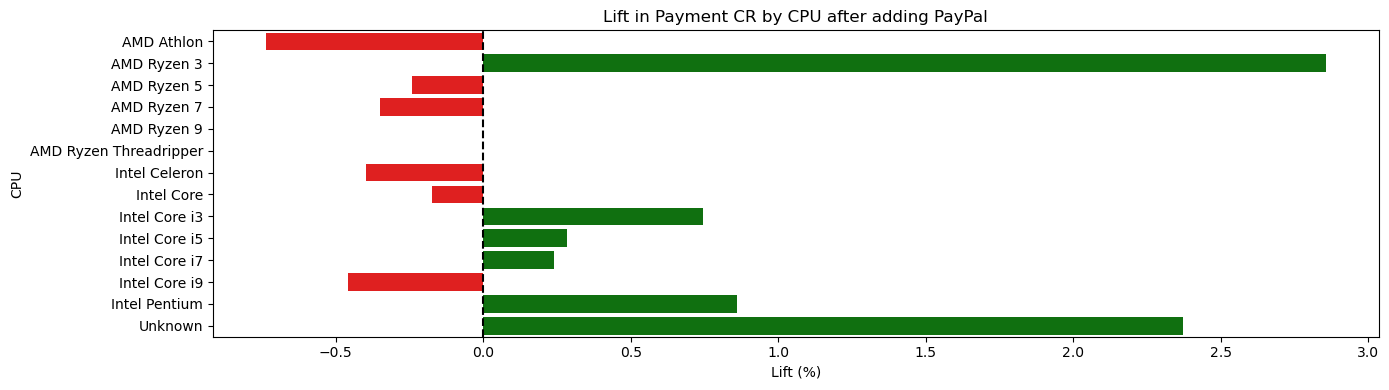

In [36]:
cpu_summary = df.groupby(['cpu', 'test_group'])['paid'].agg(['mean', 'count']).reset_index()
cpu_pivot = cpu_summary.pivot(index='cpu', columns='test_group', values='mean')
cpu_pivot['lift'] = (cpu_pivot['variant'] - cpu_pivot['control']) / cpu_pivot['control']
cpu_pivot['color'] = ['Negative' if y < 0 else 'Positive' for y in cpu_pivot['lift']]

plt.figure(figsize=(14, 4))
sns.barplot(data=cpu_pivot.reset_index(), x='lift', y='cpu', hue='color', palette={'Positive': 'green', 'Negative': 'red'}, legend=False)
plt.axvline(0, color='black', linestyle='--') 
plt.title('Lift in Payment CR by CPU after adding PayPal')
plt.xlabel('Lift (%)')
plt.ylabel('CPU')
plt.tight_layout()
plt.show()

- Users with Unknown CPU types showed significant improvement (p=0.02)
- AMD Ryzen 3 users showed borderline significance (p=0.078)
- Other processor types showed minimal to no impact from the PayPal option

### A/B test Conclusions

- The A/B test confirms that adding PayPal as an additional payment option on the cc-form significantly improves the payment conversion rate and has a positive impact on ARPU". The test results demonstrate statistically significant improvements in both key metrics

- The **variant** group had significantly higher conversion rates at "Pricing page to CC-form"" and ""CC-form to completing Payment", causing overall improvement in the main funnel "showing Ad to completing Payment"

- Adding PayPal resulted in a measurable increase in ARPU and APPU for the variant group, confirming a positive effect on both revenue and profit per user

- Segment analysis indicates that North American and Windows 11 Home users benefit the most, while other regions and OS versions show minimal effect